In [1]:
import logging
import pdb
# logging.basicConfig(level=logging.INFO)
%matplotlib inline
%run LocalRepo.ipynb
%run repos.ipynb
%run parsing.ipynb
%run metrics.ipynb
import pyfiglet

In [2]:
repos = ["ErikBrendel/LudumDare"]
# = [
    # "square/okhttp",
    # "jenkinsci/jenkins",
    # "eclipse/che",
    # "elastic/elasticsearch",
    # "apache/camel"
#]

 _____      _ _    ____                     _      _    ___              _ 
| ____|_ __(_) | _| __ ) _ __ ___ _ __   __| | ___| |  / / |   _   _  __| |
|  _| | '__| | |/ /  _ \| '__/ _ \ '_ \ / _` |/ _ \ | / /| |  | | | |/ _` |
| |___| |  | |   <| |_) | | |  __/ | | | (_| |  __/ |/ / | |__| |_| | (_| |
|_____|_|  |_|_|\_\____/|_|  \___|_| |_|\__,_|\___|_/_/  |_____\__,_|\__,_|
                                                                           
                 ____                 
 _   _ _ __ ___ |  _ \  __ _ _ __ ___ 
| | | | '_ ` _ \| | | |/ _` | '__/ _ \
| |_| | | | | | | |_| | (_| | | |  __/
 \__,_|_| |_| |_|____/ \__,_|_|  \___|
                                      

updating ErikBrendel/LudumDare...
Repo is up to date!
No precalculated evolutionary values found, starting calculations...
Commits to analyze: 266



Calculated evolutionary values, saving them now...
Most linked nodes:
['7.207936507936509: logic/Asteroid.java <> logic/Layer.java', '5.843650793650793: logic/Game.java <> logic/Player.java', '4.946825396825397: logic/Game.java <> logic/Layer.java', '4.441269841269841: logic/Player.java <> logic/Physics.java', '4.03015873015873: logic/Game.java <> logic/Asteroid.java', '3.038167388167388: main/Main.java <> util/menu/Menu.java', '2.8802308802308803: main/Main.java <> main/Project.java', '2.852380952380952: logic/Player.java <> logic/Asteroid.java', '2.78015873015873: logic/Player.java <> logic/Layer.java', '2.7023809523809526: logic/Game.java <> logic/HUD.java']

Results from the evolutionary view:

WeightGraph statistics: 96 nodes, 560 edges, 2 connected component(s), with sizes: [91, 5]
Edge weights: [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285] ... [4.03015873015873, 4.441269841269841, 4.946825396825397, 5.843650793650793, 

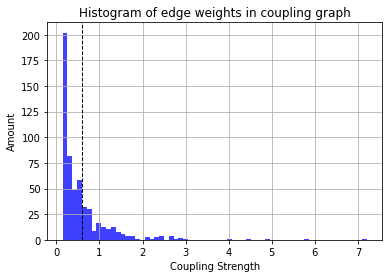

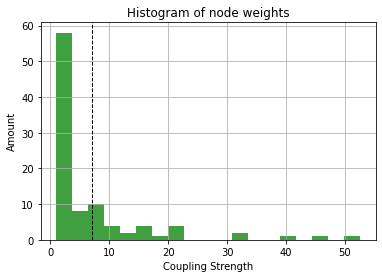

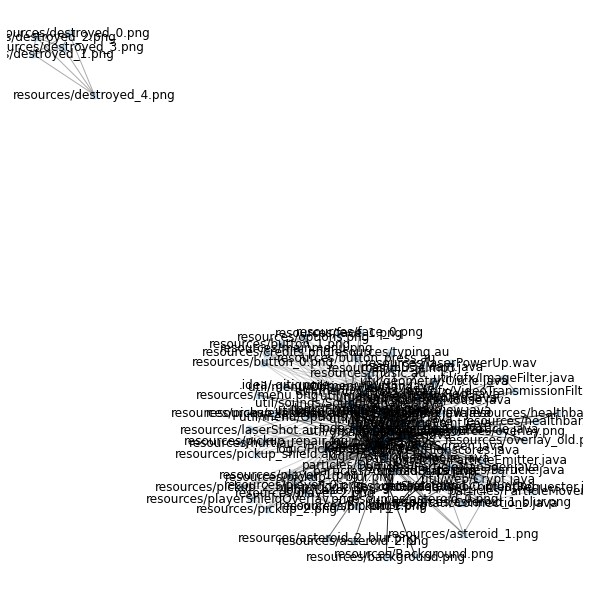




Program is over!


In [3]:
views = ["evolutionary"] # ["structural", "evolutionary", "linguistic"]

for repo in repos:
    r = LocalRepo(repo)
    print(pyfiglet.figlet_format(r.name))
    r.update()
    
    # pdb.set_trace()
    # tree = RepoTree.init_from_repo(r)
    # print(r.get_tree())
    
    for view in views:
        MetricManager.clear(r, view)

        coupling_graph = MetricManager.get(r, view)
        coupling_graph.plaintext_save(repo, view)
        # coupling_graph.html_save(repo, view)
        
        
        print("Most linked nodes:")
        debug_list = sorted(list(coupling_graph.g.edges.data()), key = lambda e: -e[2]["weight"])
        print([str(info["weight"]) + ": " + a + " <> " + b for a, b, info in debug_list[0:10]])

        print("\nResults from the " + view + " view:\n")

        coupling_graph.print_statistics()
        coupling_graph.show_weight_histogram()
        coupling_graph.visualize(use_spring = False, with_labels = True)
        print("\n")
    
    
print("\nProgram is over!")